### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 376_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,...,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000
mean,0.048431,0.446759,0.806623,1.393093,1.816990,4.285857,1.095238,1.023847,1.016974,1.034512,...,1.938697,1.438564,2.064046,2.015223,0.962058,1.902784,2.072030,1.985134,1.988122,48.813943
std,0.010881,0.020362,0.009210,0.023463,0.049270,1.674225,0.025644,0.008662,0.003624,0.016925,...,0.023545,0.053809,0.016584,0.043153,0.057721,0.030292,0.009149,0.012248,0.034508,14.143396
min,0.014967,0.396739,0.788550,1.366896,1.731580,2.198365,1.042837,1.014963,0.928226,0.998419,...,1.871989,1.339936,1.848276,1.886337,0.613205,1.737349,1.977658,1.960779,1.873881,27.700000
25%,0.040790,0.432021,0.800175,1.378620,1.776843,3.002669,1.078718,1.019708,1.016364,1.024388,...,1.923976,1.408156,2.062061,1.979392,0.937331,1.887208,2.072685,1.979431,1.974364,39.100000
50%,0.047722,0.449995,0.804323,1.384934,1.813562,3.620053,1.089358,1.021915,1.017866,1.036846,...,1.938234,1.430325,2.070744,2.023827,0.972583,1.908793,2.073119,1.984465,1.994265,45.500000
75%,0.053670,0.465375,0.810772,1.393016,1.840209,5.323125,1.104588,1.024302,1.019203,1.049036,...,1.951983,1.459662,2.073240,2.052740,0.996550,1.922255,2.073512,1.988567,2.014201,54.900000
max,0.094827,0.490316,0.841812,1.484619,1.985914,14.052863,1.320012,1.127772,1.022956,1.067107,...,2.033162,1.787182,2.077966,2.078786,1.073925,1.955209,2.075325,2.077065,2.054394,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

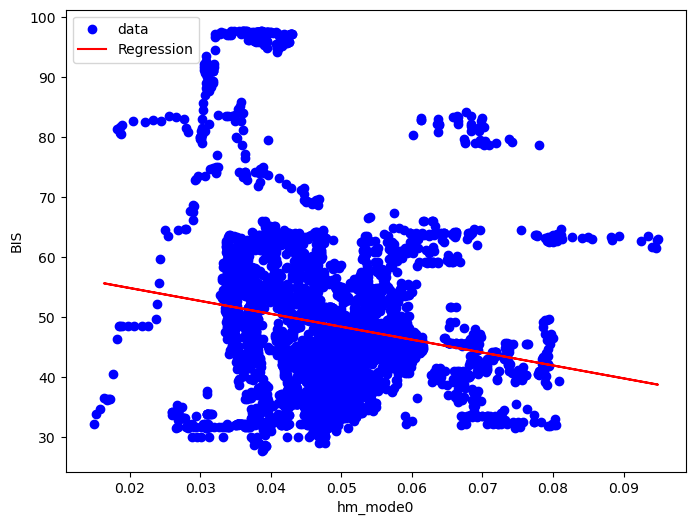

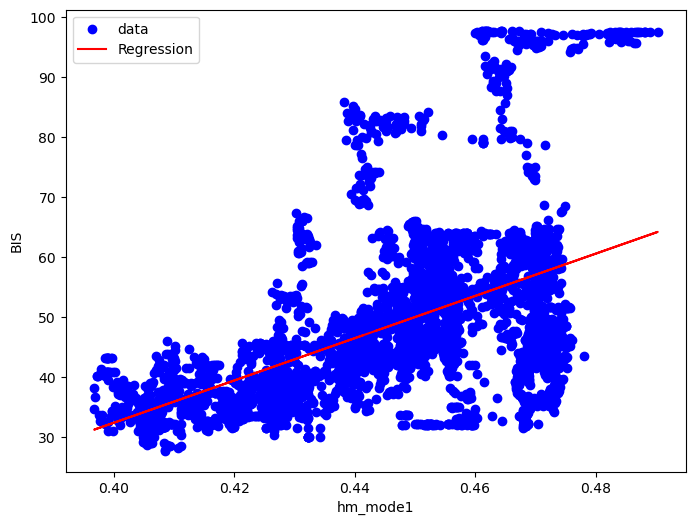

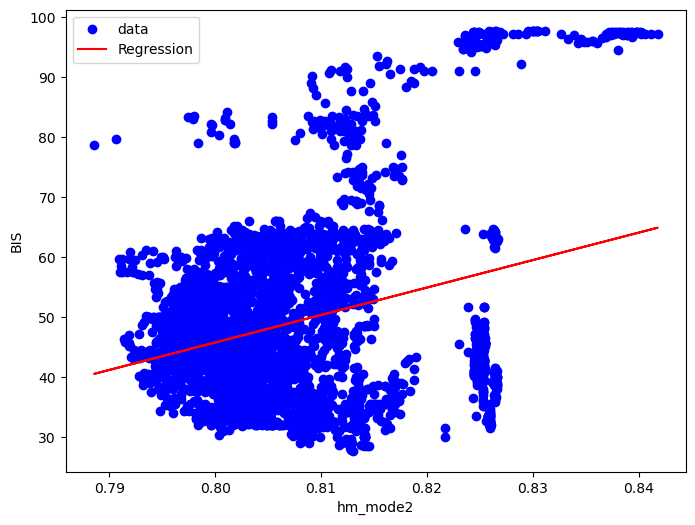

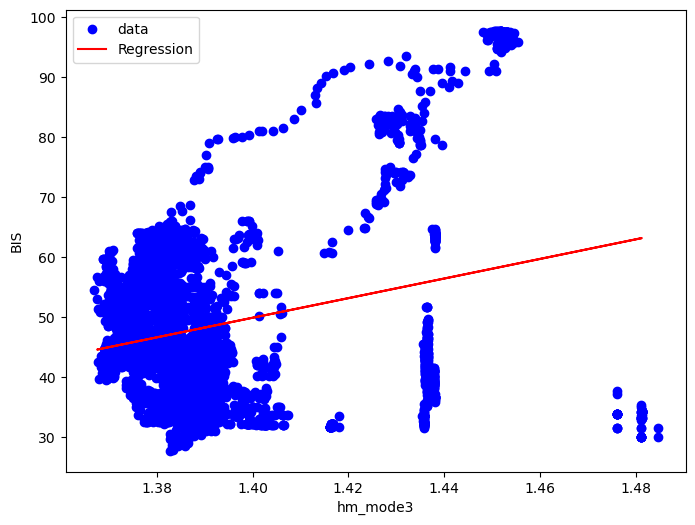

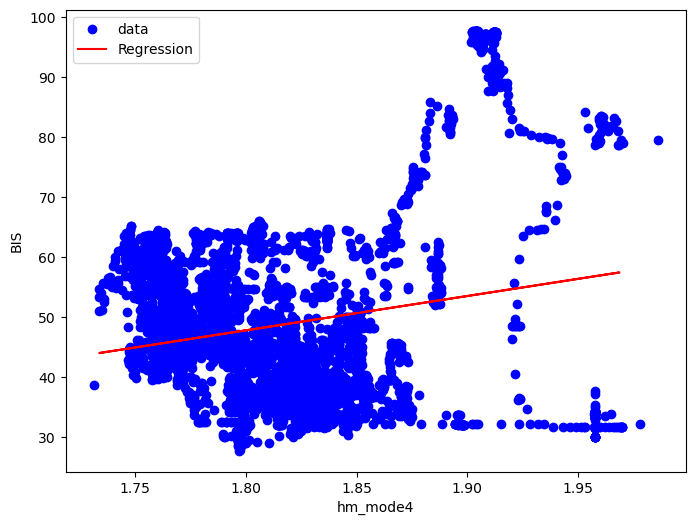

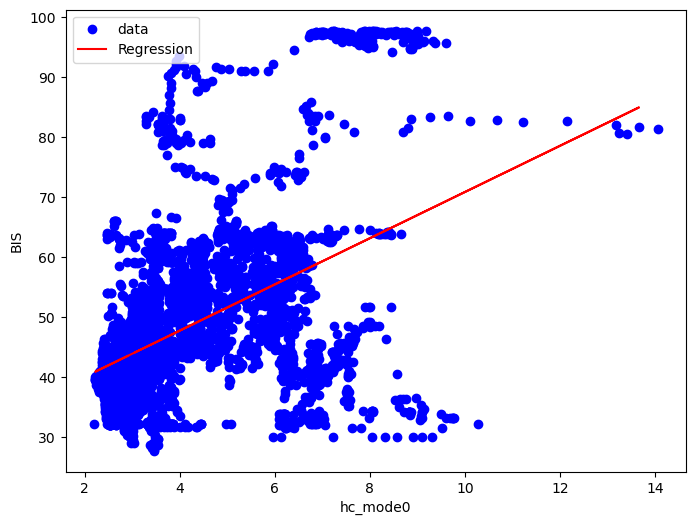

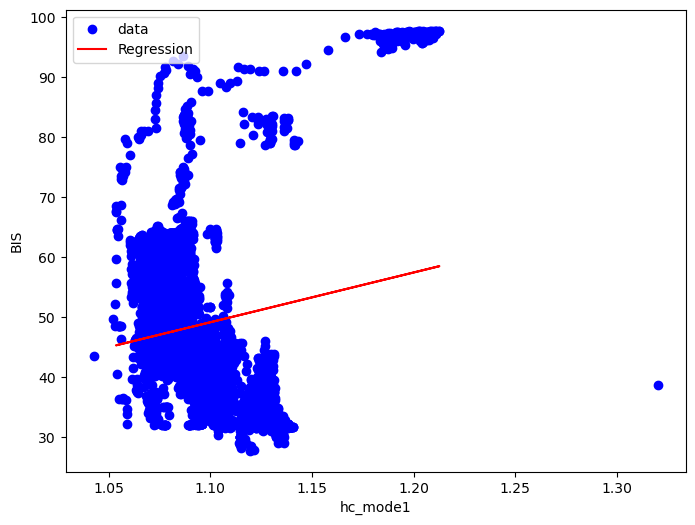

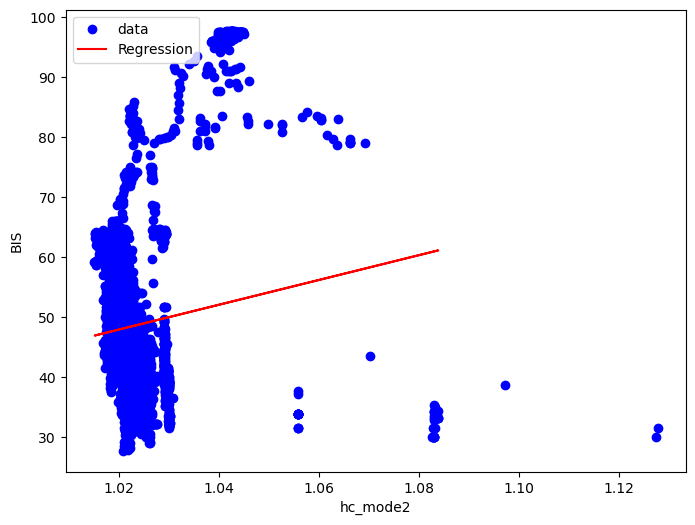

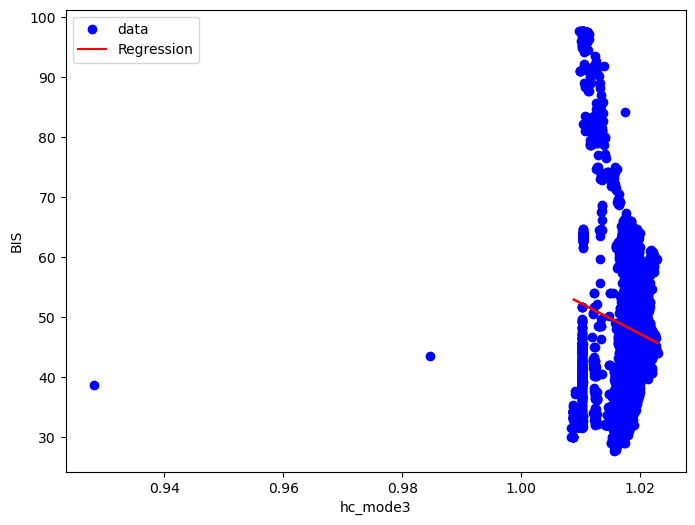

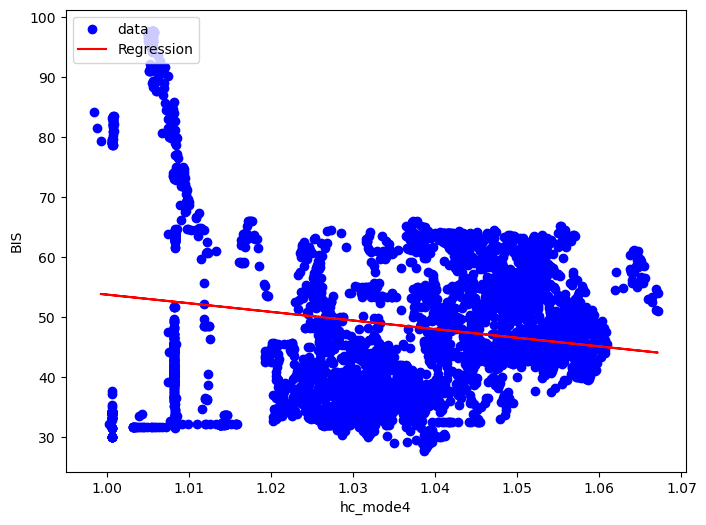

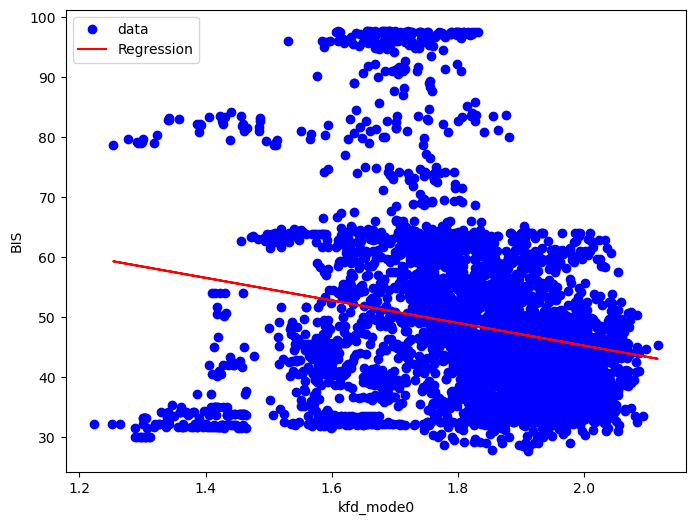

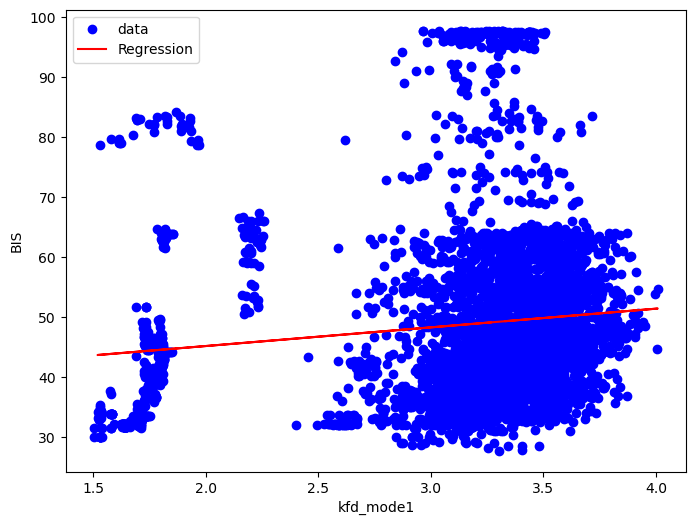

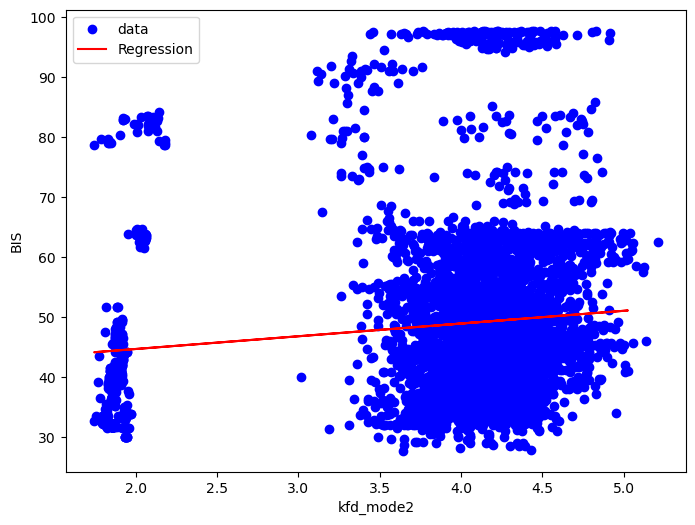

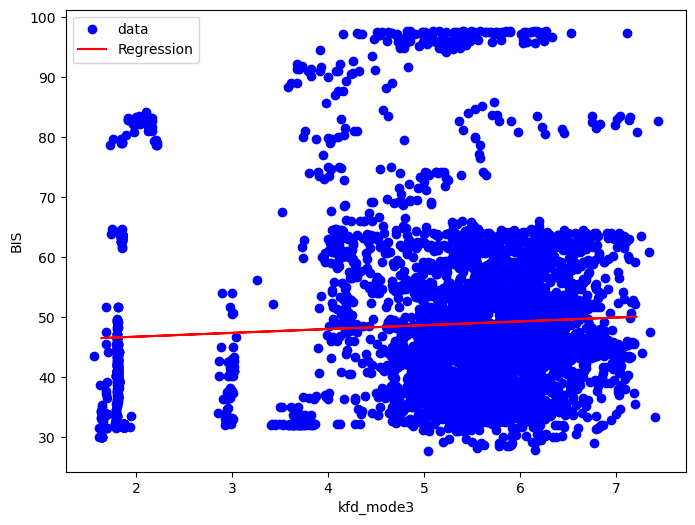

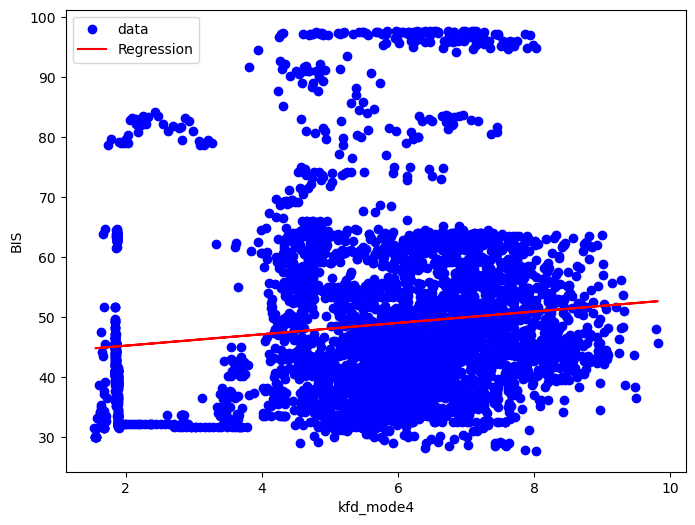

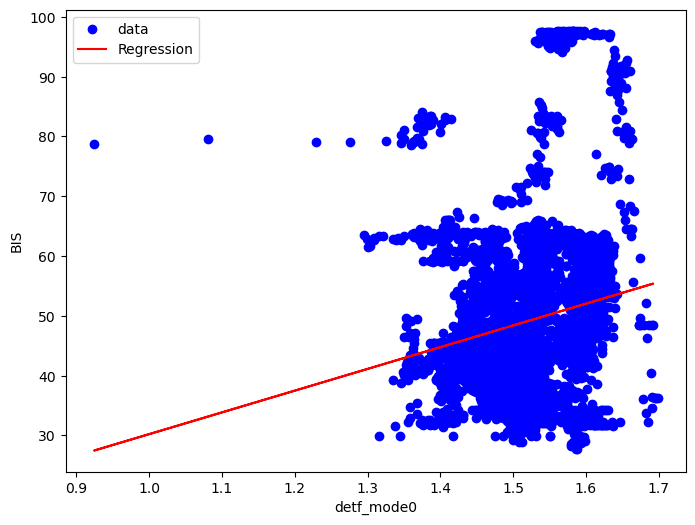

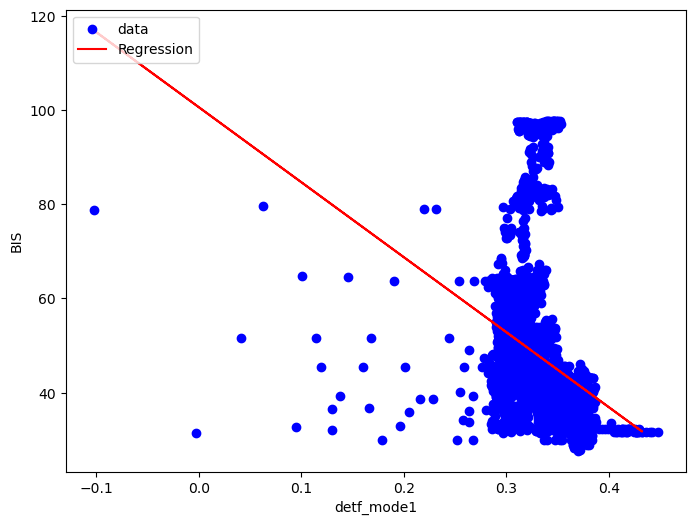

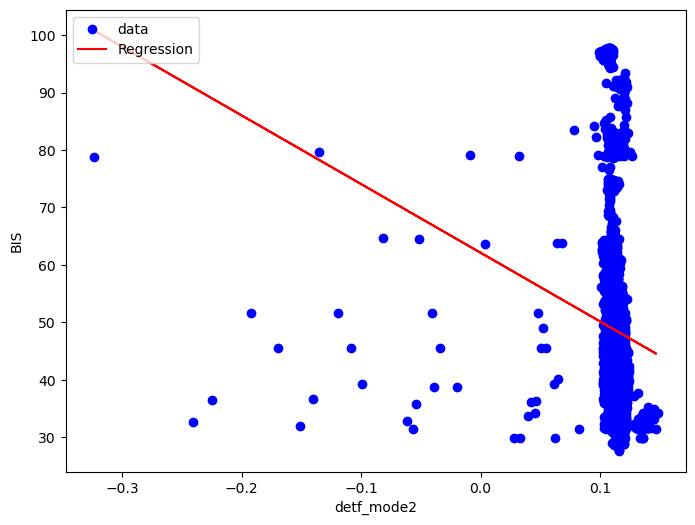

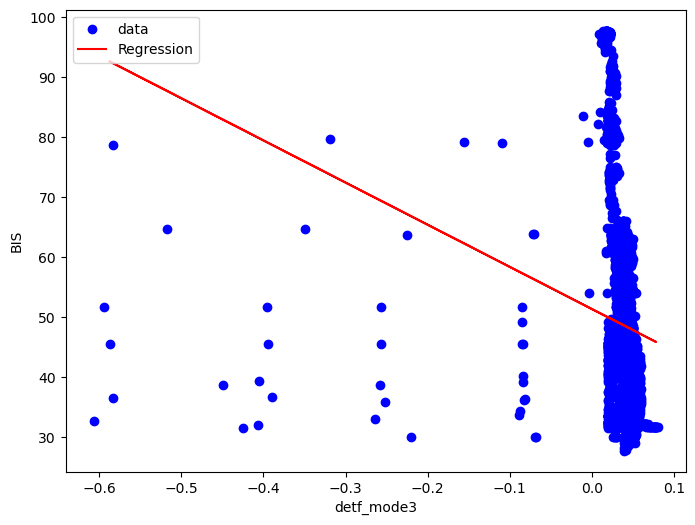

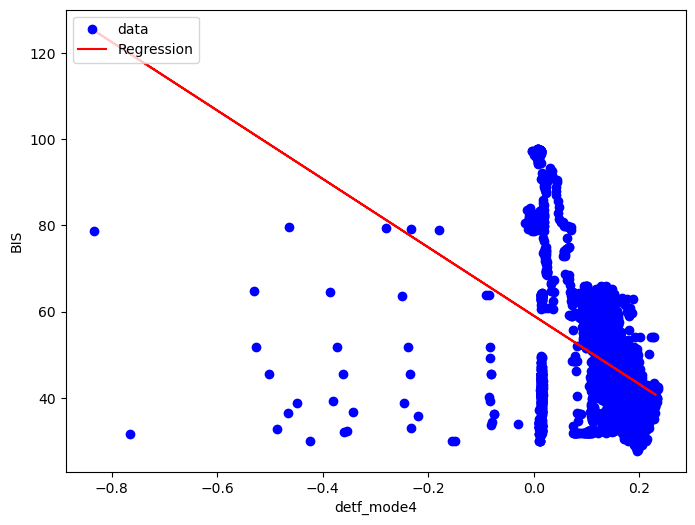

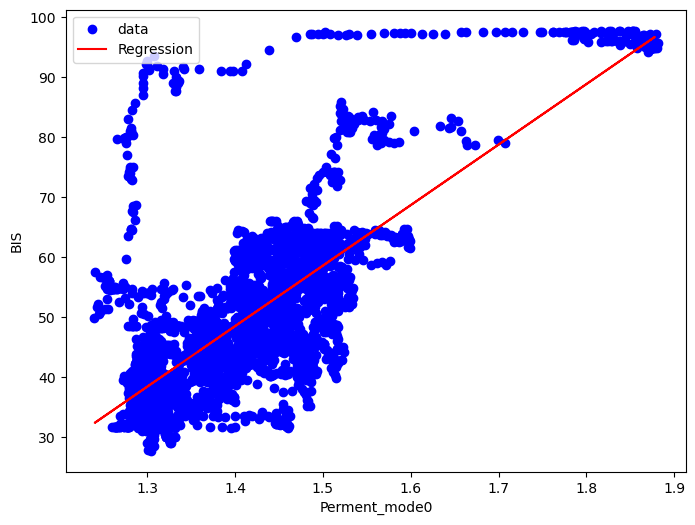

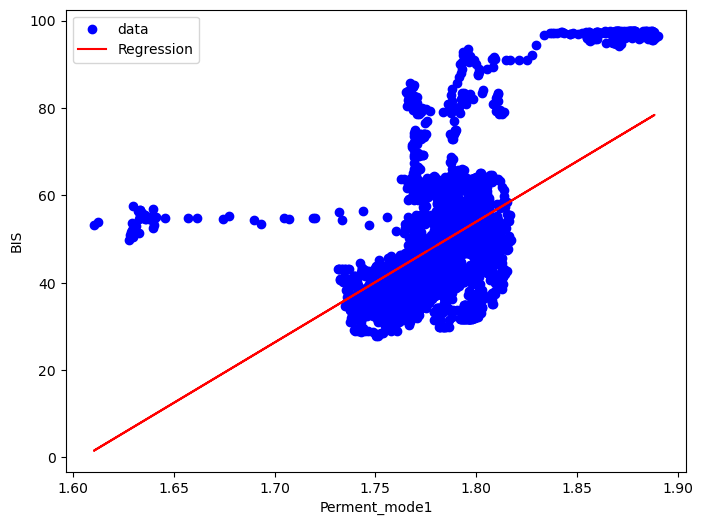

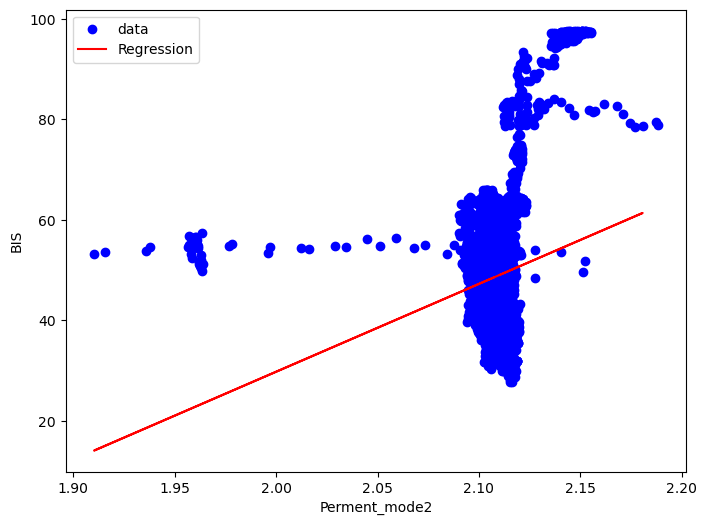

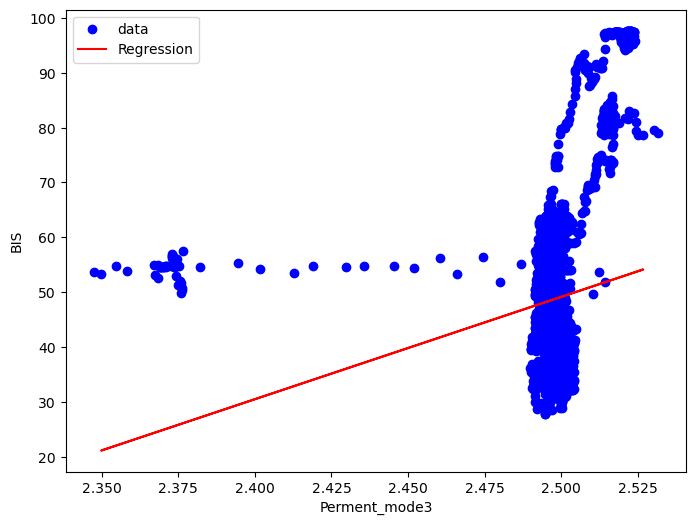

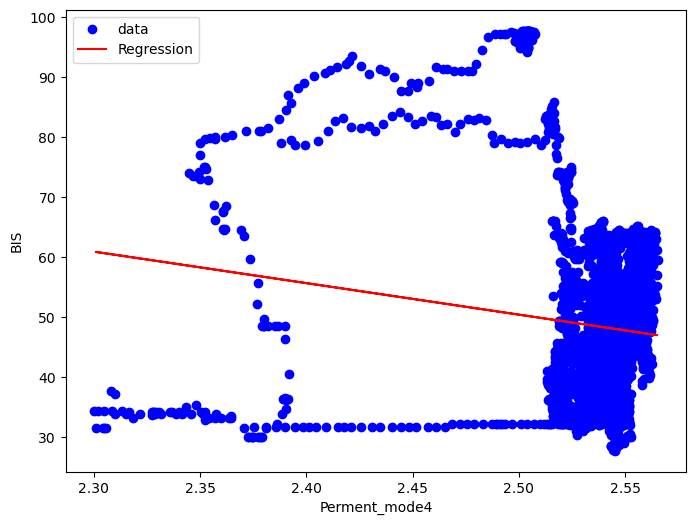

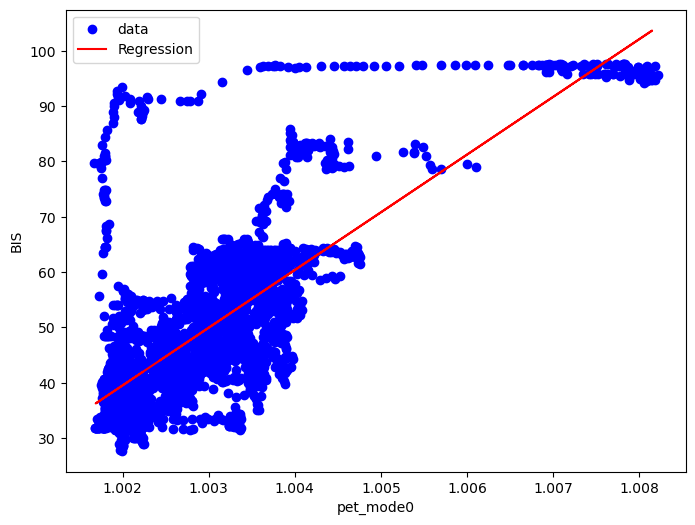

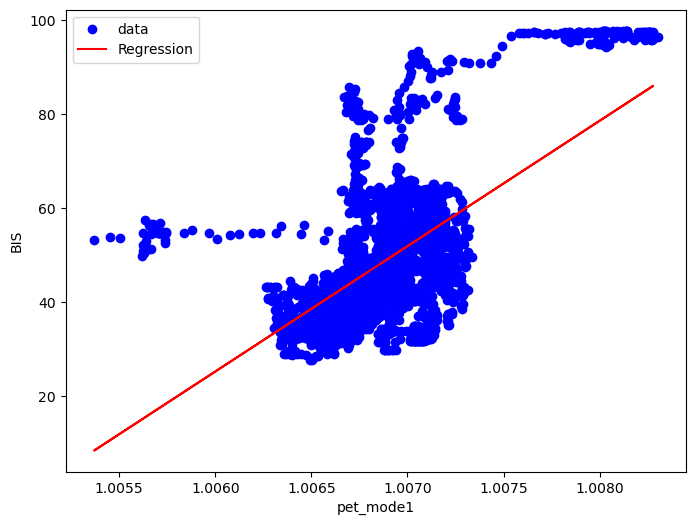

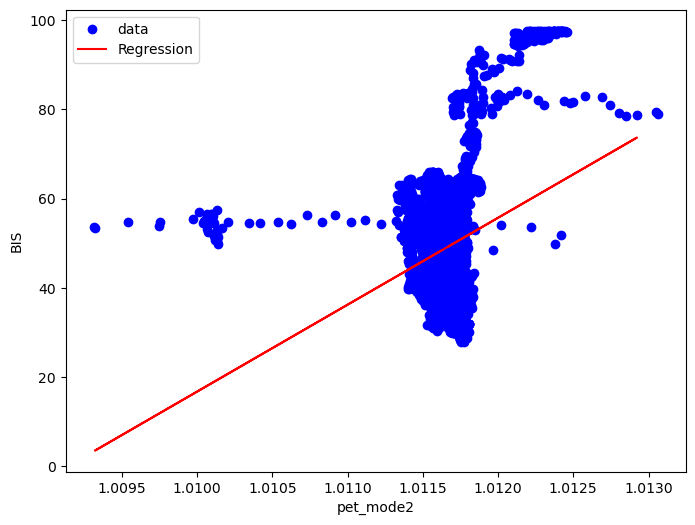

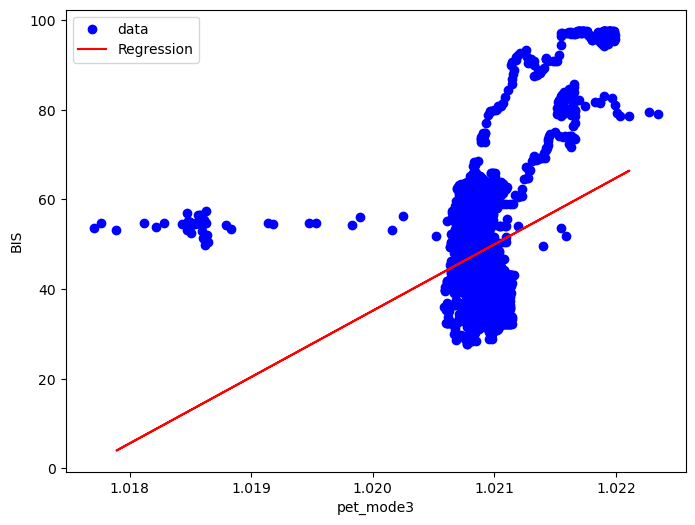

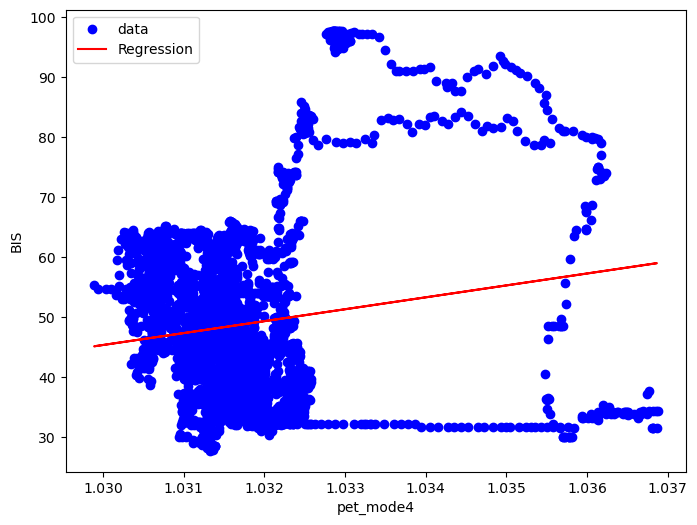

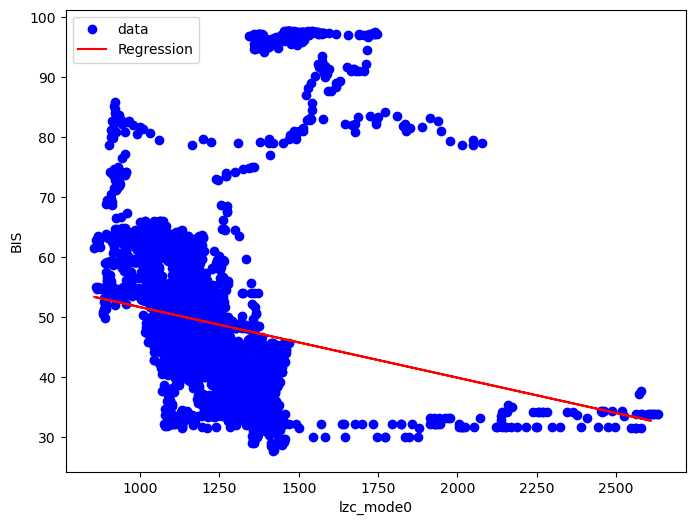

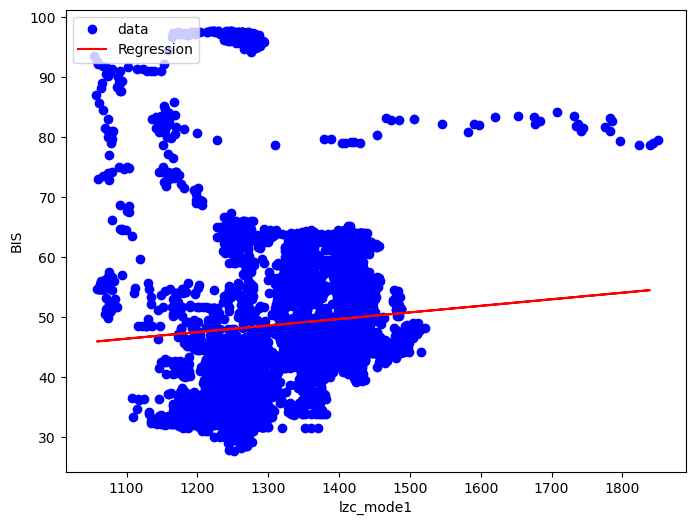

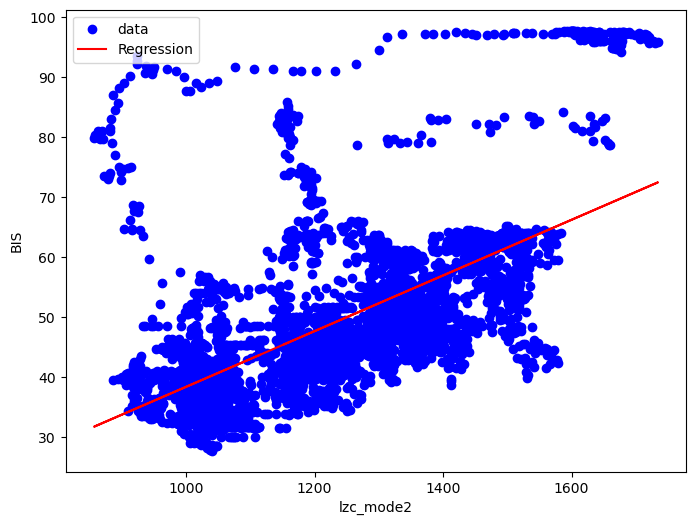

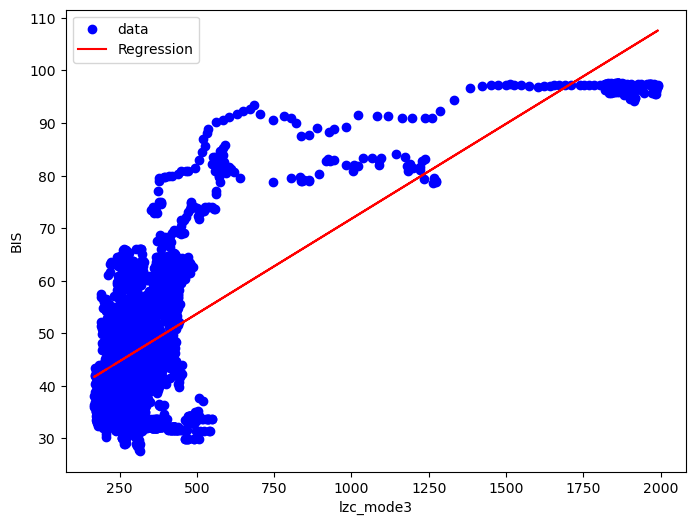

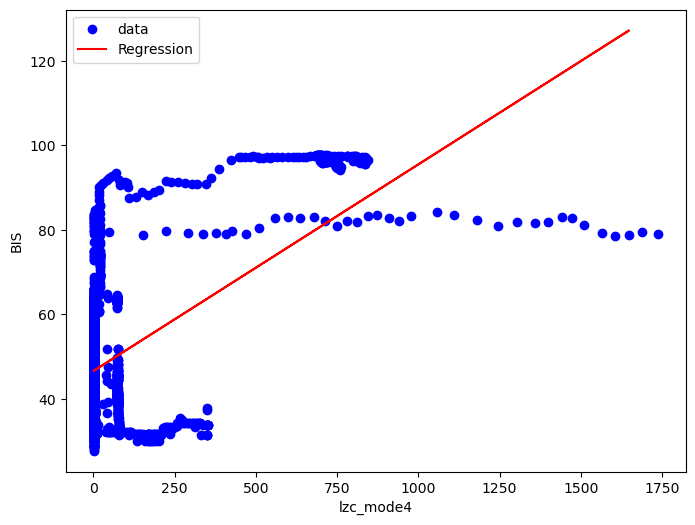

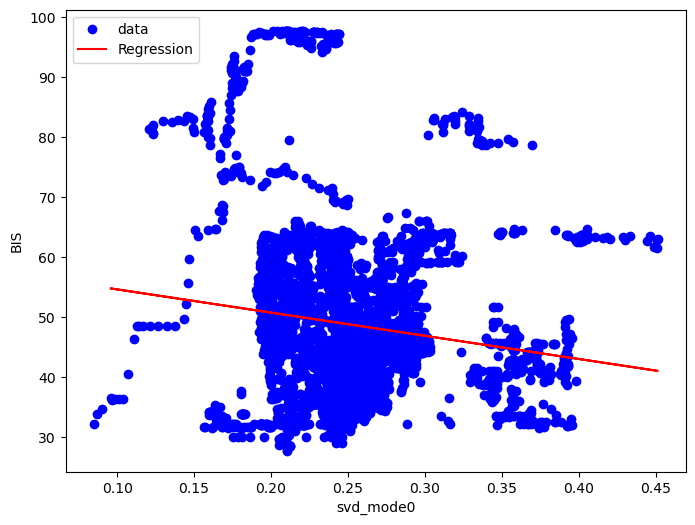

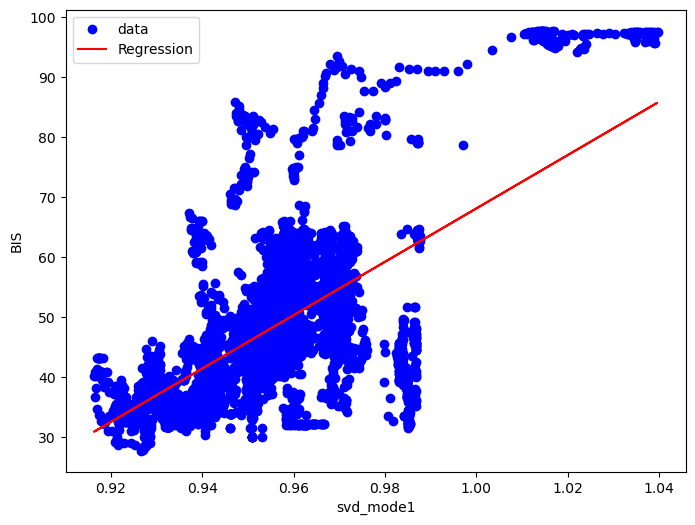

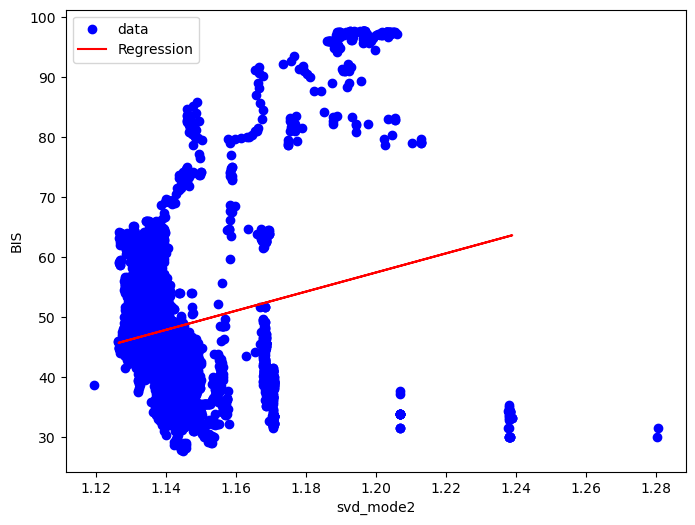

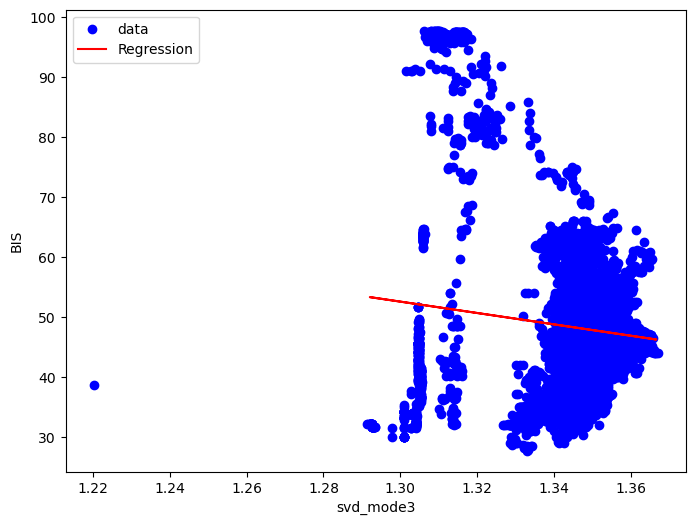

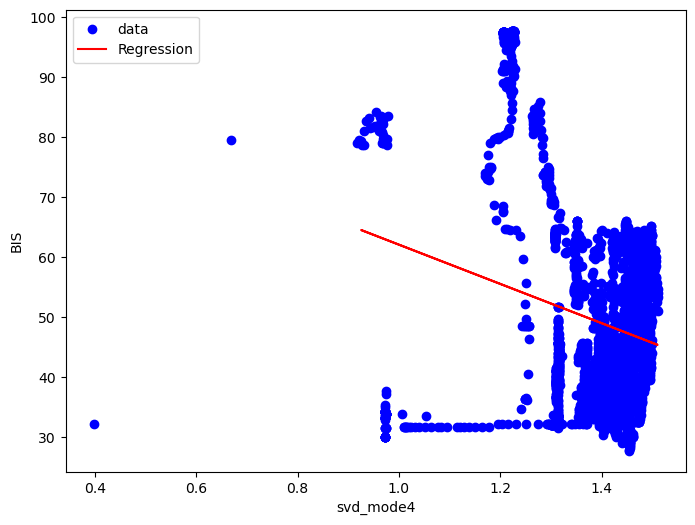

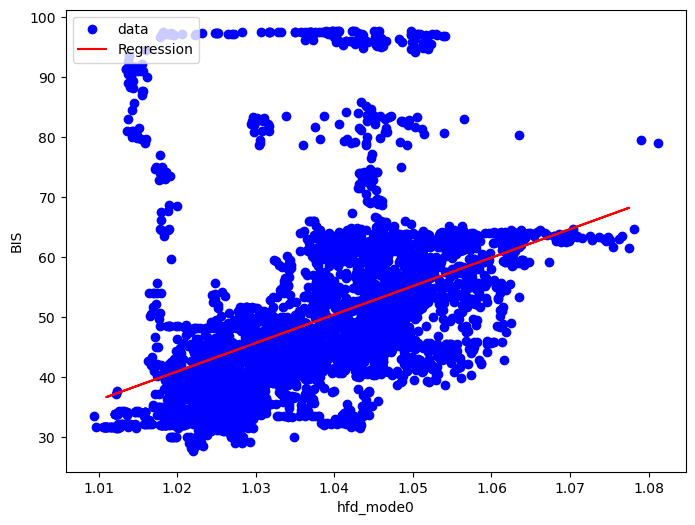

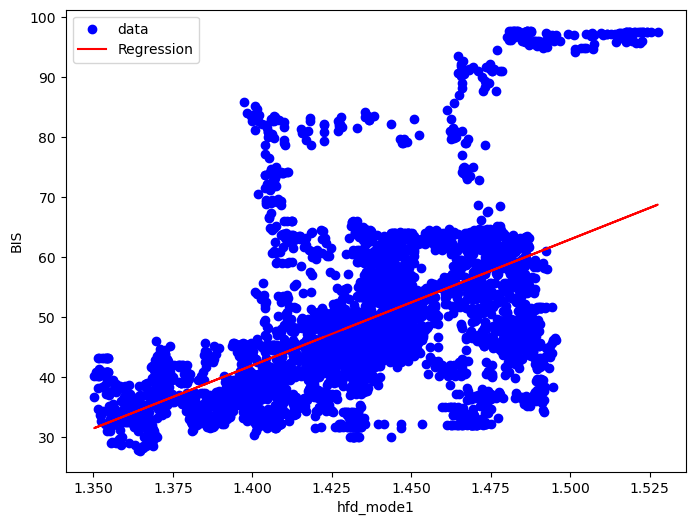

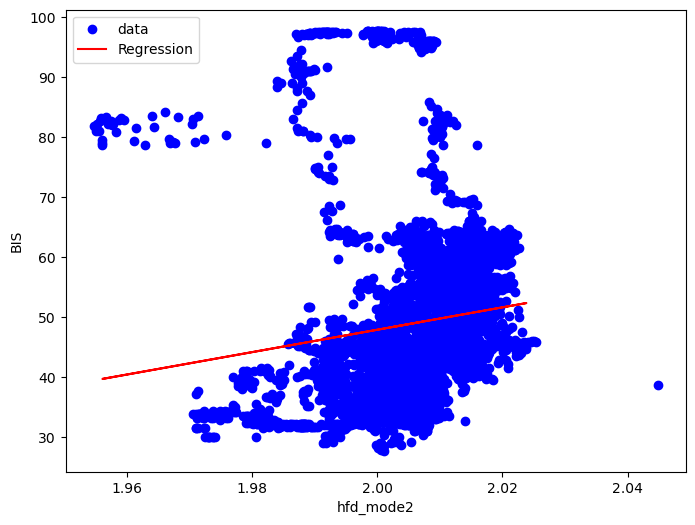

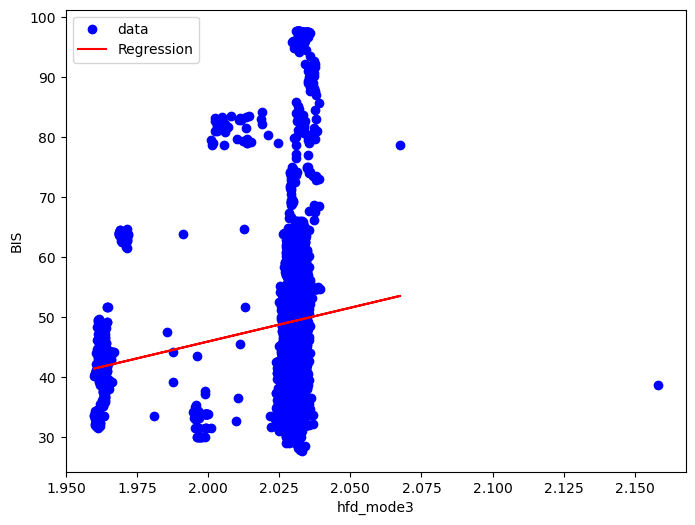

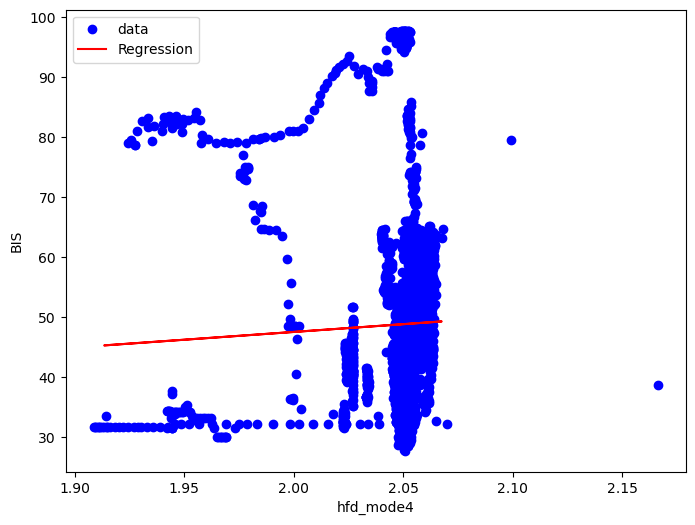

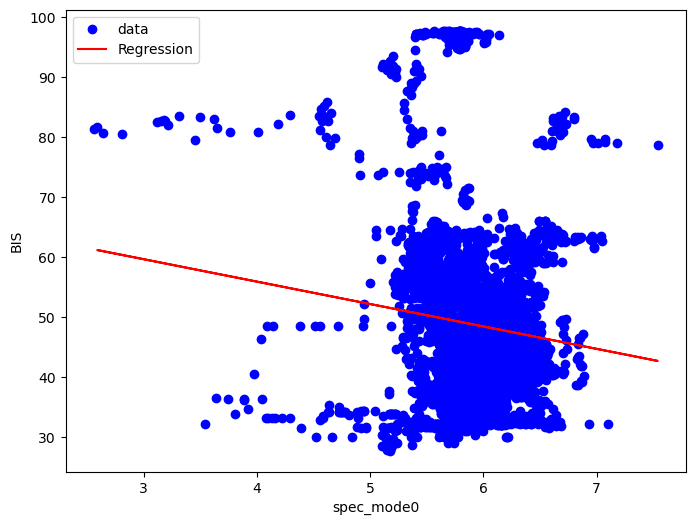

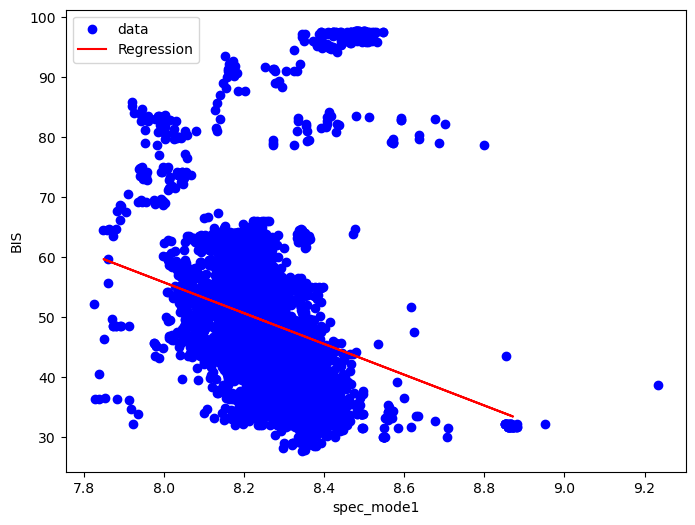

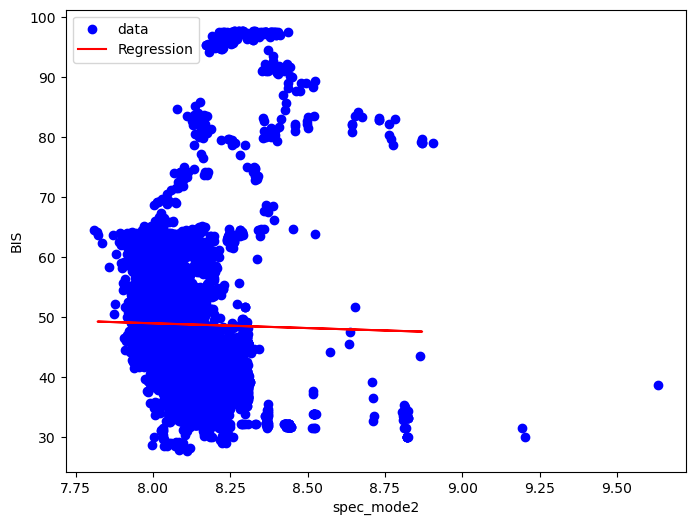

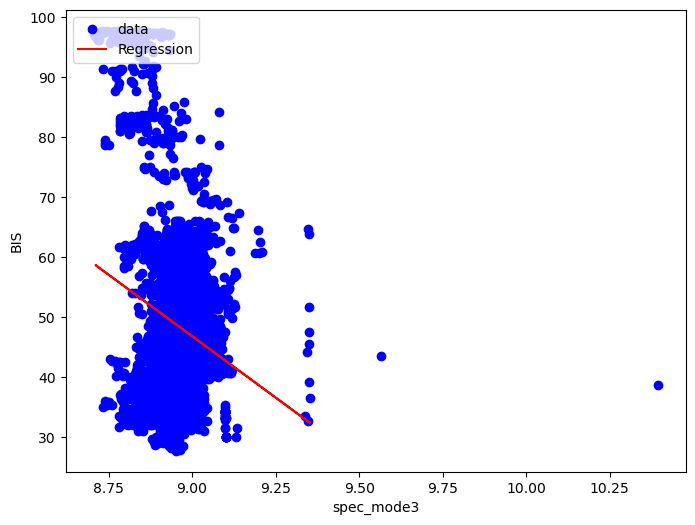

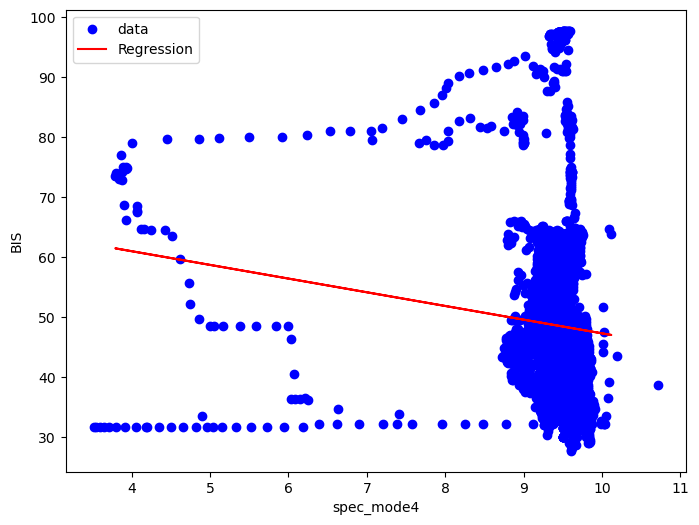

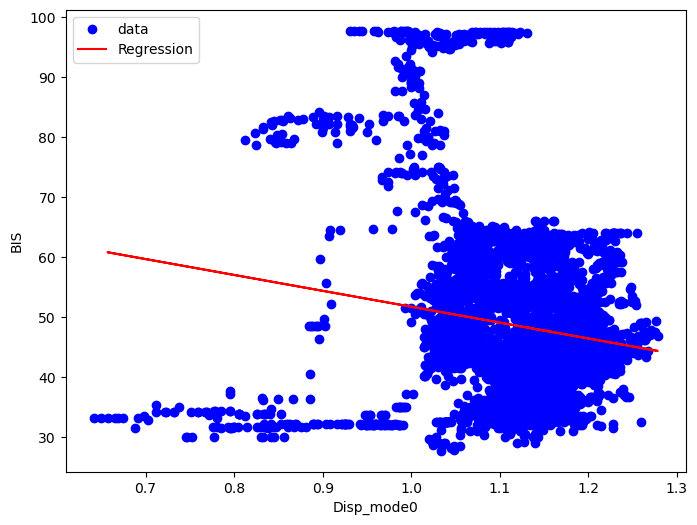

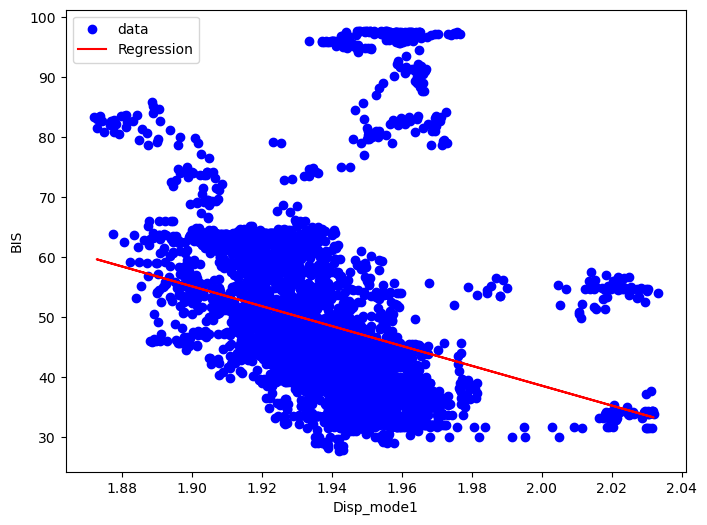

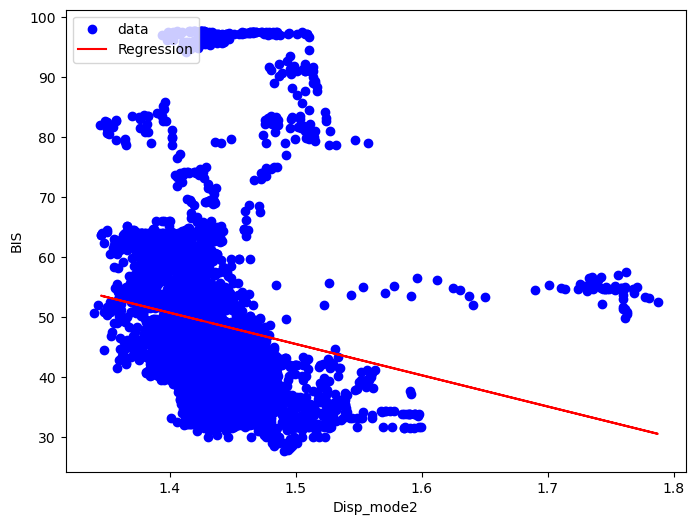

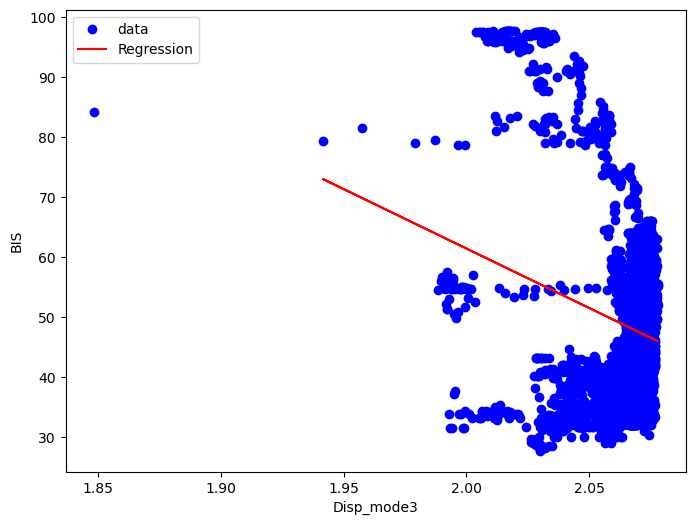

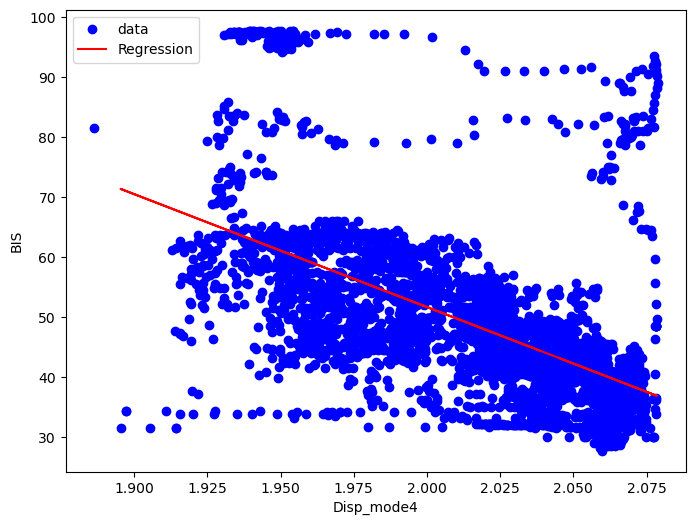

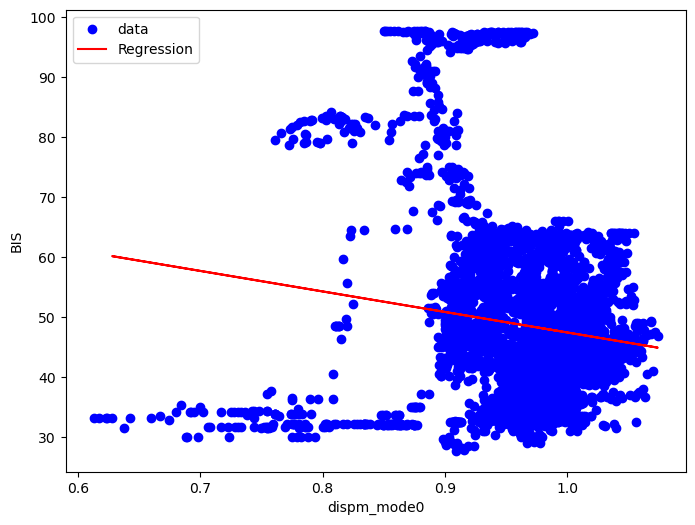

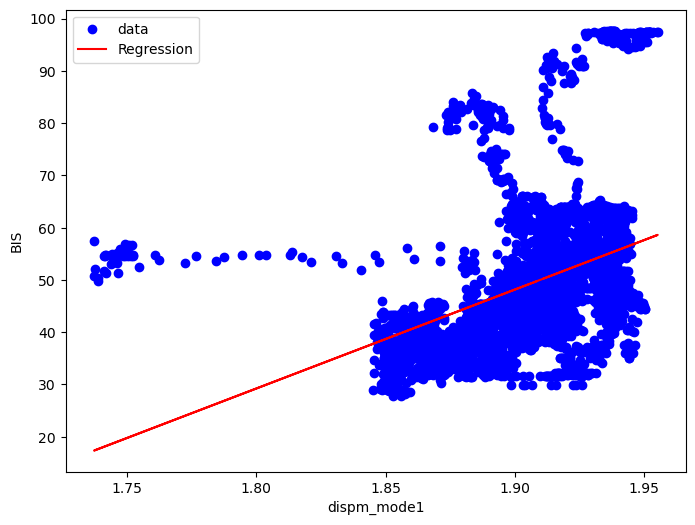

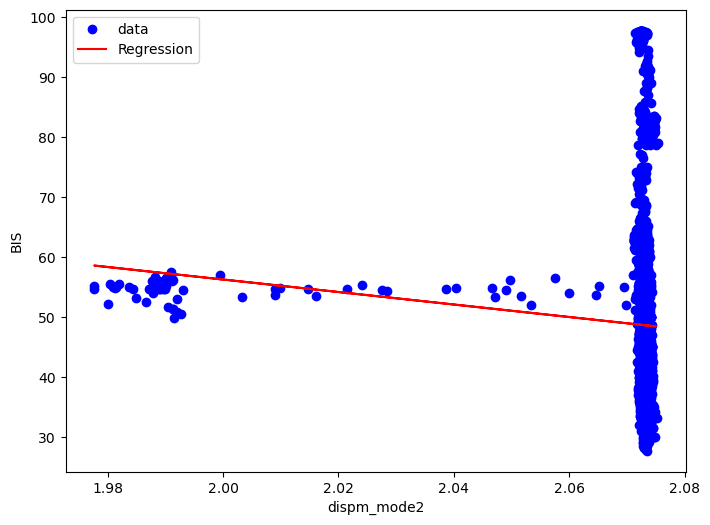

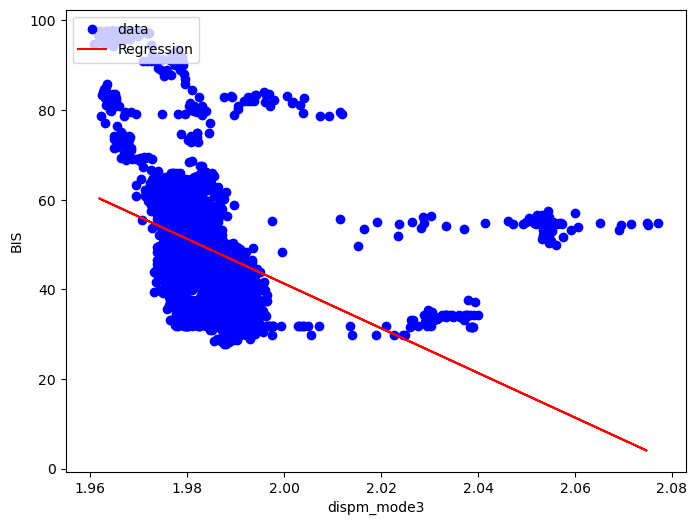

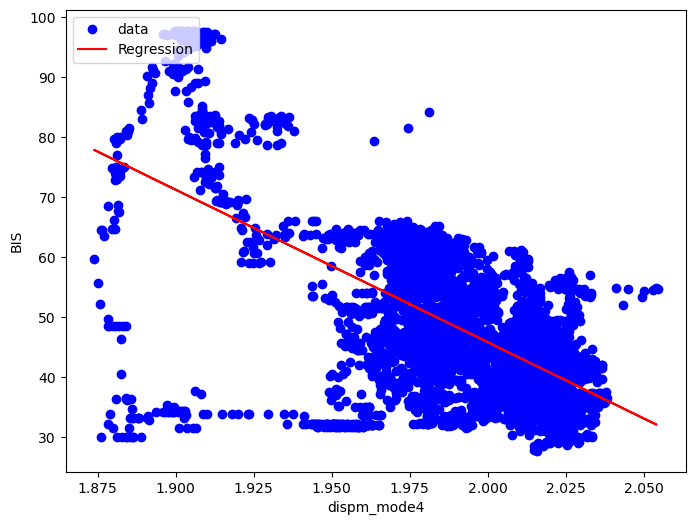

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
25,pet_mode0_r2,60.633436
20,Perment_mode0_r2,58.274988
33,lzc_mode3_r2,54.734245
59,dispm_mode4_r2,40.400395
36,svd_mode1_r2,39.718566
32,lzc_mode2_r2,39.413450
54,Disp_mode4_r2,38.402048
26,pet_mode1_r2,34.295141
34,lzc_mode4_r2,33.188622
41,hfd_mode1_r2,30.172901


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
23  Perment_mode3    0.422127
54     Disp_mode4    0.096490
33      lzc_mode3    0.079914
40      hfd_mode0    0.041062
31      lzc_mode1    0.040933
28      pet_mode3    0.033359
16     detf_mode1    0.029118
56    dispm_mode1    0.025013
6        hc_mode1    0.020798
20  Perment_mode0    0.016226
32      lzc_mode2    0.015135
30      lzc_mode0    0.014526
9        hc_mode4    0.011335
37      svd_mode2    0.010181
38      svd_mode3    0.008922
41      hfd_mode1    0.008408
42      hfd_mode2    0.008041
19     detf_mode4    0.007636
59    dispm_mode4    0.007583
49     spec_mode4    0.006604
53     Disp_mode3    0.005268
51     Disp_mode1    0.005095
8        hc_mode3    0.004147
4        hm_mode4    0.004134
52     Disp_mode2    0.003927
55    dispm_mode0    0.003869
45     spec_mode0    0.003727
3        hm_mode3    0.003644
22  Perment_mode2    0.003569
2        hm_mode2    0.003345
12      kfd_mode2    0.003324
5        hc_mode0    0.003133
25      pe